<a href="https://colab.research.google.com/github/rumanz22/N-gram-/blob/main/nlp_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import string
import re
import numpy as np
import matplotlib.pyplot as plt

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

data =  pd.read_csv('/content/IMDB Dataset.csv')

# Create DataFrame
df = pd.DataFrame(data)

# Function to preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize into sentences (if needed)
    sentences = nltk.sent_tokenize(text)

    # Tokenize each sentence into words
    words = [nltk.word_tokenize(sentence) for sentence in sentences]

    return words

# Apply preprocessing to the 'review' column
df['preprocessed_review'] = df['review'].apply(preprocess_text)

# Show the result
print(df[['review', 'preprocessed_review']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                  review  \
0      One of the other reviewers has mentioned that ...   
1      A wonderful little production. <br /><br />The...   
2      I thought this was a wonderful way to spend ti...   
3      Basically there's a family where a little boy ...   
4      Petter Mattei's "Love in the Time of Money" is...   
...                                                  ...   
49995  I thought this movie did a down right good job...   
49996  Bad plot, bad dialogue, bad acting, idiotic di...   
49997  I am a Catholic taught in parochial elementary...   
49998  I'm going to have to disagree with the previou...   
49999  No one expects the Star Trek movies to be high...   

                                     preprocessed_review  
0      [[one, of, the, other, reviewers, has, mention...  
1      [[a, wonderful, little, production, br, br, th...  
2      [[i, thought, this, was, a, wonderful, way, to...  
3      [[basically, theres, a, family, wher

In [ ]:
import nltk
from collections import defaultdict

# Function to generate n-grams from tokenized data
def generate_ngrams(tokenized_data, n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    return ngrams_list

# Function to store frequency counts of n-grams
def ngram_frequency(tokenized_data, n):
    ngrams_list = generate_ngrams(tokenized_data, n)
    ngram_freq_dict = defaultdict(int)

    for ngram in ngrams_list:
        ngram_freq_dict[ngram] += 1

    return dict(ngram_freq_dict)

# Example tokenized data (from previous preprocessing step)
# For simplicity, using a single flattened list of words here
tokenized_reviews = [
    ['i', 'loved', 'the', 'movie'],
    ['it', 'was', 'great'],
    ['terrible', 'movie', 'worst', 'ever'],
    ['an', 'average', 'film', 'nothing', 'special']
]

# Combine all tokenized reviews into a single list of words
all_words = [word for review in tokenized_reviews for word in review]

# Generate and count frequency of n-grams for n = 1, 2, 3, and 4
for n in range(1, 5):
    ngram_freq = ngram_frequency(all_words, n)
    print(f"\n{n}-Grams Frequency:")
    print(ngram_freq)



1-Grams Frequency:
{('i',): 1, ('loved',): 1, ('the',): 1, ('movie',): 2, ('it',): 1, ('was',): 1, ('great',): 1, ('terrible',): 1, ('worst',): 1, ('ever',): 1, ('an',): 1, ('average',): 1, ('film',): 1, ('nothing',): 1, ('special',): 1}

2-Grams Frequency:
{('i', 'loved'): 1, ('loved', 'the'): 1, ('the', 'movie'): 1, ('movie', 'it'): 1, ('it', 'was'): 1, ('was', 'great'): 1, ('great', 'terrible'): 1, ('terrible', 'movie'): 1, ('movie', 'worst'): 1, ('worst', 'ever'): 1, ('ever', 'an'): 1, ('an', 'average'): 1, ('average', 'film'): 1, ('film', 'nothing'): 1, ('nothing', 'special'): 1}

3-Grams Frequency:
{('i', 'loved', 'the'): 1, ('loved', 'the', 'movie'): 1, ('the', 'movie', 'it'): 1, ('movie', 'it', 'was'): 1, ('it', 'was', 'great'): 1, ('was', 'great', 'terrible'): 1, ('great', 'terrible', 'movie'): 1, ('terrible', 'movie', 'worst'): 1, ('movie', 'worst', 'ever'): 1, ('worst', 'ever', 'an'): 1, ('ever', 'an', 'average'): 1, ('an', 'average', 'film'): 1, ('average', 'film', 'nothin

In [ ]:
import nltk
from collections import defaultdict

# Function to generate n-grams from tokenized data
def generate_ngrams(tokenized_data, n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    return ngrams_list

# Function to store frequency counts of n-grams
def ngram_frequency(tokenized_data, n):
    ngrams_list = generate_ngrams(tokenized_data, n)
    ngram_freq_dict = defaultdict(int)

    for ngram in ngrams_list:
        ngram_freq_dict[ngram] += 1

    return dict(ngram_freq_dict)

# Function to calculate n-gram probabilities
def ngram_probabilities(tokenized_data, n):
    # Get n-gram and (n-1)-gram frequency counts
    ngram_freq = ngram_frequency(tokenized_data, n)
    n_minus_1_gram_freq = ngram_frequency(tokenized_data, n-1) if n > 1 else None

    ngram_prob_dict = {}

    for ngram, count in ngram_freq.items():
        if n > 1:
            # Get the (n-1)-gram for denominator (all but the last word in the n-gram)
            n_minus_1_gram = ngram[:-1]
            n_minus_1_gram_count = n_minus_1_gram_freq.get(n_minus_1_gram, 1)  # Smoothing for missing (n-1)-gram
            # Calculate probability
            prob = count / n_minus_1_gram_count
        else:
            # For unigrams, probability is simply the count of the unigram divided by total words
            total_unigrams = sum(ngram_freq.values())
            prob = count / total_unigrams

        ngram_prob_dict[ngram] = prob

    return ngram_prob_dict

# Example tokenized data (from previous preprocessing step)
tokenized_reviews = [
    ['i', 'loved', 'the', 'movie'],
    ['it', 'was', 'great'],
    ['terrible', 'movie', 'worst', 'ever'],
    ['an', 'average', 'film', 'nothing', 'special']
]

# Combine all tokenized reviews into a single list of words
all_words = [word for review in tokenized_reviews for word in review]

# Calculate probabilities for bigrams (n = 2)
n = 2
ngram_probs = ngram_probabilities(all_words, n)

print(f"\n{n}-Gram Probabilities:")
for ngram, prob in ngram_probs.items():
    print(f"{ngram}: {prob}")



2-Gram Probabilities:
('i', 'loved'): 1.0
('loved', 'the'): 1.0
('the', 'movie'): 1.0
('movie', 'it'): 0.5
('it', 'was'): 1.0
('was', 'great'): 1.0
('great', 'terrible'): 1.0
('terrible', 'movie'): 1.0
('movie', 'worst'): 0.5
('worst', 'ever'): 1.0
('ever', 'an'): 1.0
('an', 'average'): 1.0
('average', 'film'): 1.0
('film', 'nothing'): 1.0
('nothing', 'special'): 1.0


In [ ]:
import nltk
from collections import defaultdict

# Function to generate n-grams from tokenized data
def generate_ngrams(tokenized_data, n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    return ngrams_list

# Function to store frequency counts of n-grams
def ngram_frequency(tokenized_data, n):
    ngrams_list = generate_ngrams(tokenized_data, n)
    ngram_freq_dict = defaultdict(int)

    for ngram in ngrams_list:
        ngram_freq_dict[ngram] += 1

    return dict(ngram_freq_dict)

# 1. Laplace Smoothing (Add-One Smoothing)
def laplace_smoothing(tokenized_data, n):
    # Get n-gram and (n-1)-gram frequency counts
    ngram_freq = ngram_frequency(tokenized_data, n)
    n_minus_1_gram_freq = ngram_frequency(tokenized_data, n-1) if n > 1 else None

    # Vocabulary size (number of unique tokens)
    vocabulary = set(tokenized_data)
    V = len(vocabulary)

    ngram_prob_dict = {}

    for ngram, count in ngram_freq.items():
        if n > 1:
            # Get the (n-1)-gram for denominator (all but the last word in the n-gram)
            n_minus_1_gram = ngram[:-1]
            n_minus_1_gram_count = n_minus_1_gram_freq.get(n_minus_1_gram, 0)
            # Add 1 to both numerator and denominator (Laplace Smoothing)
            prob = (count + 1) / (n_minus_1_gram_count + V)
        else:
            # For unigrams, add 1 to each count and divide by (total + V)
            total_unigrams = sum(ngram_freq.values())
            prob = (count + 1) / (total_unigrams + V)

        ngram_prob_dict[ngram] = prob

    return ngram_prob_dict

# 2. Good-Turing Discounting
def good_turing_discounting(tokenized_data, n):
    # Get n-gram frequency counts
    ngram_freq = ngram_frequency(tokenized_data, n)

    # Frequency of frequencies (how many n-grams appear exactly 1, 2, 3 times, etc.)
    freq_of_freqs = defaultdict(int)
    for count in ngram_freq.values():
        freq_of_freqs[count] += 1

    # Calculate discounted counts (Good-Turing)
    discounted_ngram_prob = {}
    total_ngrams = sum(ngram_freq.values())

    for ngram, count in ngram_freq.items():
        if count + 1 in freq_of_freqs:
            # Apply Good-Turing formula: C* = (C + 1) * (N(C+1) / N(C))
            discounted_count = (count + 1) * (freq_of_freqs[count + 1] / freq_of_freqs[count])
        else:
            # If no higher frequency exists, use the original count
            discounted_count = count
        # Calculate probability with discounted count
        discounted_ngram_prob[ngram] = discounted_count / total_ngrams

    return discounted_ngram_prob

# Example tokenized data (from previous preprocessing step)
tokenized_reviews = [
    ['i', 'loved', 'the', 'movie'],
    ['it', 'was', 'great'],
    ['terrible', 'movie', 'worst', 'ever'],
    ['an', 'average', 'film', 'nothing', 'special']
]

# Combine all tokenized reviews into a single list of words
all_words = [word for review in tokenized_reviews for word in review]

# Laplace Smoothing for bigrams (n=2)
n = 2
laplace_probs = laplace_smoothing(all_words, n)
print(f"\nLaplace Smoothing {n}-Gram Probabilities:")
for ngram, prob in laplace_probs.items():
    print(f"{ngram}: {prob}")

# Good-Turing Discounting for bigrams (n=2)
good_turing_probs = good_turing_discounting(all_words, n)
print(f"\nGood-Turing Discounting {n}-Gram Probabilities:")
for ngram, prob in good_turing_probs.items():
    print(f"{ngram}: {prob}")



Laplace Smoothing 2-Gram Probabilities:
('i', 'loved'): 0.125
('loved', 'the'): 0.125
('the', 'movie'): 0.125
('movie', 'it'): 0.11764705882352941
('it', 'was'): 0.125
('was', 'great'): 0.125
('great', 'terrible'): 0.125
('terrible', 'movie'): 0.125
('movie', 'worst'): 0.11764705882352941
('worst', 'ever'): 0.125
('ever', 'an'): 0.125
('an', 'average'): 0.125
('average', 'film'): 0.125
('film', 'nothing'): 0.125
('nothing', 'special'): 0.125

Good-Turing Discounting 2-Gram Probabilities:
('i', 'loved'): 0.06666666666666667
('loved', 'the'): 0.06666666666666667
('the', 'movie'): 0.06666666666666667
('movie', 'it'): 0.06666666666666667
('it', 'was'): 0.06666666666666667
('was', 'great'): 0.06666666666666667
('great', 'terrible'): 0.06666666666666667
('terrible', 'movie'): 0.06666666666666667
('movie', 'worst'): 0.06666666666666667
('worst', 'ever'): 0.06666666666666667
('ever', 'an'): 0.06666666666666667
('an', 'average'): 0.06666666666666667
('average', 'film'): 0.06666666666666667
('f

In [ ]:
from collections import defaultdict
import nltk

# Function to generate n-grams from tokenized data
def generate_ngrams(tokenized_data, n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    return ngrams_list

# Function to store frequency counts of n-grams
def ngram_frequency(tokenized_data, n):
    ngrams_list = generate_ngrams(tokenized_data, n)
    ngram_freq_dict = defaultdict(int)

    for ngram in ngrams_list:
        ngram_freq_dict[ngram] += 1

    return dict(ngram_freq_dict)

# Function to calculate unigram frequency
def unigram_frequency(tokenized_data):
    unigram_freq = defaultdict(int)

    for word in tokenized_data:
        unigram_freq[word] += 1

    return dict(unigram_freq)

# Kneser-Ney Smoothing for bigrams
def kneser_ney_smoothing(tokenized_data, D=0.75):
    # Get bigram and unigram frequency counts
    bigram_freq = ngram_frequency(tokenized_data, 2)
    unigram_freq = unigram_frequency(tokenized_data)

    # Count how often each word appears as a continuation in a bigram (i.e., it's a new word in that context)
    continuation_count = defaultdict(int)
    for (w1, w2) in bigram_freq:
        continuation_count[w2] += 1

    # Total number of bigrams
    total_bigrams = sum(bigram_freq.values())

    # Calculate unigram probabilities (lower-order)
    total_unigrams = sum(unigram_freq.values())
    unigram_prob = {word: freq / total_unigrams for word, freq in unigram_freq.items()}

    # Calculate the lambda (backoff weight) for each word
    lambda_dict = defaultdict(float)
    for (w1, _), bigram_count in bigram_freq.items():
        continuation_bigrams = sum(1 for (w1_, w2_) in bigram_freq if w1_ == w1)
        lambda_dict[w1] = (D * continuation_bigrams) / unigram_freq[w1]

    # Kneser-Ney probabilities for bigrams
    kn_prob_dict = {}

    for (w1, w2), bigram_count in bigram_freq.items():
        # Discounted bigram probability
        p_continuation = continuation_count[w2] / total_bigrams
        discounted_prob = max(bigram_count - D, 0) / unigram_freq[w1]
        kn_prob_dict[(w1, w2)] = discounted_prob + lambda_dict[w1] * p_continuation

    return kn_prob_dict

# Example tokenized data (from previous preprocessing step)
tokenized_reviews = [
    ['i', 'loved', 'the', 'movie'],
    ['it', 'was', 'great'],
    ['terrible', 'movie', 'worst', 'ever'],
    ['an', 'average', 'film', 'nothing', 'special']
]

# Combine all tokenized reviews into a single list of words
all_words = [word for review in tokenized_reviews for word in review]

# Apply Kneser-Ney Smoothing for bigrams
kneser_ney_probs = kneser_ney_smoothing(all_words)

print("\nKneser-Ney Smoothed Bigram Probabilities:")
for bigram, prob in kneser_ney_probs.items():
    print(f"{bigram}: {prob}")



Kneser-Ney Smoothed Bigram Probabilities:
('i', 'loved'): 0.3
('loved', 'the'): 0.3
('the', 'movie'): 0.35
('movie', 'it'): 0.175
('it', 'was'): 0.3
('was', 'great'): 0.3
('great', 'terrible'): 0.3
('terrible', 'movie'): 0.35
('movie', 'worst'): 0.175
('worst', 'ever'): 0.3
('ever', 'an'): 0.3
('an', 'average'): 0.3
('average', 'film'): 0.3
('film', 'nothing'): 0.3
('nothing', 'special'): 0.3


In [ ]:
import math

# Function to calculate perplexity for an n-gram model
def calculate_perplexity(model_prob_dict, tokenized_test_data, n):
    N = len(tokenized_test_data) - (n - 1)  # Number of n-grams in test data

    log_prob_sum = 0
    # Loop through the test data and calculate log-probabilities for each n-gram
    for i in range(n-1, len(tokenized_test_data)):
        ngram = tuple(tokenized_test_data[i-(n-1):i+1])  # Create an n-gram (e.g., bigram or trigram)
        if ngram in model_prob_dict:
            prob = model_prob_dict[ngram]  # Get the n-gram probability from the model
        else:
            # If n-gram doesn't exist, assign a very small probability (smoothing)
            prob = 1e-6

        log_prob_sum += math.log(prob)

    # Calculate perplexity
    avg_log_prob = log_prob_sum / N
    perplexity = math.exp(-avg_log_prob)

    return perplexity

# Example tokenized test data
tokenized_test_data = ['i', 'loved', 'the', 'movie', 'it', 'was', 'great']

# Assuming we already have probability dictionaries for different models:
# - `laplace_probs` for the Laplace-smoothed bigram model
# - `kneser_ney_probs` for the Kneser-Ney smoothed bigram model
# You can calculate perplexity for these models using the test data

# Perplexity for the Laplace-smoothed bigram model
laplace_perplexity = calculate_perplexity(laplace_probs, tokenized_test_data, n=2)
print(f"Perplexity for Laplace-smoothed bigram model: {laplace_perplexity}")

# Perplexity for the Kneser-Ney smoothed bigram model
kneser_ney_perplexity = calculate_perplexity(kneser_ney_probs, tokenized_test_data, n=2)
print(f"Perplexity for Kneser-Ney smoothed bigram model: {kneser_ney_perplexity}")


Perplexity for Laplace-smoothed bigram model: 8.081242579620882
Perplexity for Kneser-Ney smoothed bigram model: 3.554142321871133


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import math

# Function to calculate perplexity for an n-gram model
def calculate_perplexity(model_prob_dict, tokenized_test_data, n):
    N = len(tokenized_test_data) - (n - 1)  # Number of n-grams in test data
    log_prob_sum = 0

    # Loop through the test data and calculate log-probabilities for each n-gram
    for i in range(n-1, len(tokenized_test_data)):
        ngram = tuple(tokenized_test_data[i-(n-1):i+1])  # Create an n-gram (e.g., bigram or trigram)
        if ngram in model_prob_dict:
            prob = model_prob_dict[ngram]  # Get the n-gram probability from the model
        else:
            # If n-gram doesn't exist, assign a very small probability (smoothing)
            prob = 1e-6

        log_prob_sum += math.log(prob)

    # Calculate perplexity
    avg_log_prob = log_prob_sum / N
    perplexity = math.exp(-avg_log_prob)

    return perplexity

# Example placeholder function for Laplace smoothing (needs implementation)
def laplace_smoothing(tokenized_train_data, n):
    # Here, you'll generate n-gram counts and apply Laplace smoothing
    # This is just a placeholder function
    model_prob_dict = {}  # Example n-gram probability dictionary
    # Add your implementation to compute the n-gram probabilities
    return model_prob_dict

# Example placeholder function for Kneser-Ney smoothing (needs implementation)
def kneser_ney_smoothing(tokenized_train_data):
    # Implement Kneser-Ney smoothing for n-grams
    model_prob_dict = {}  # Example n-gram probability dictionary
    # Add your implementation to compute the n-gram probabilities
    return model_prob_dict

# Function for k-fold cross-validation to evaluate perplexity
def k_fold_cross_validation(tokenized_data, n, model_type, k=4):
    # Split data into k folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    perplexities = []

    # Loop through each fold
    for train_index, test_index in kf.split(tokenized_data):
        # Split into training and test data
        train_data = [tokenized_data[i] for i in train_index]
        test_data = [tokenized_data[i] for i in test_index]

        # Flatten the train and test lists
        train_data_flat = [word for review in train_data for word in review]
        test_data_flat = [word for review in test_data for word in review]

        # Generate model probabilities based on model_type
        if model_type == 'laplace':
            model_prob_dict = laplace_smoothing(train_data_flat, n)
        elif model_type == 'kneser_ney':
            model_prob_dict = kneser_ney_smoothing(train_data_flat)

        # Calculate perplexity for the current fold
        perplexity = calculate_perplexity(model_prob_dict, test_data_flat, n)
        perplexities.append(perplexity)

    # Calculate the average perplexity across all folds
    avg_perplexity = np.mean(perplexities)

    return avg_perplexity

# Example tokenized data (from previous preprocessing step)
tokenized_reviews = [
    ['i', 'loved', 'the', 'movie'],
    ['it', 'was', 'great'],
    ['terrible', 'movie', 'worst', 'ever'],
    ['an', 'average', 'film', 'nothing', 'special']
]

# Use 4-fold cross-validation to evaluate Laplace-smoothing bigram model
avg_perplexity_laplace = k_fold_cross_validation(tokenized_reviews, n=2, model_type='laplace', k=4)
print(f"Average Perplexity for Laplace-smoothed bigram model (4-fold CV): {avg_perplexity_laplace}")

# Use 4-fold cross-validation to evaluate Kneser-Ney bigram model
avg_perplexity_kn = k_fold_cross_validation(tokenized_reviews, n=2, model_type='kneser_ney', k=4)
print(f"Average Perplexity for Kneser-Ney smoothed bigram model (4-fold CV): {avg_perplexity_kn}")


Average Perplexity for Laplace-smoothed bigram model (4-fold CV): 999999.9999999995
Average Perplexity for Kneser-Ney smoothed bigram model (4-fold CV): 999999.9999999995


Perplexity for laplace smoothing with 1-grams: 999999.9999999995
Perplexity for kneser_ney smoothing with 1-grams: 999999.9999999995
Perplexity for laplace smoothing with 2-grams: 999999.9999999995
Perplexity for kneser_ney smoothing with 2-grams: 999999.9999999995
Perplexity for laplace smoothing with 3-grams: 999999.9999999995
Perplexity for kneser_ney smoothing with 3-grams: 999999.9999999995


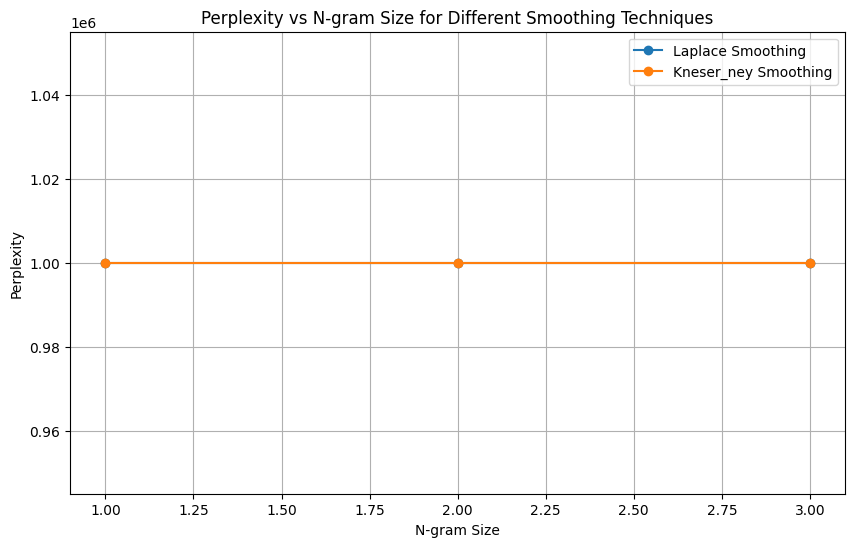

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have implemented the smoothing techniques (Laplace, Kneser-Ney, etc.)
# and the k_fold_cross_validation() function, here's how to run the evaluations and plot the results.

# Example n-gram sizes and smoothing techniques
n_gram_sizes = [1, 2, 3]  # Unigram, bigram, trigram
smoothing_techniques = ['laplace', 'kneser_ney']

# Initialize a dictionary to store perplexity results
perplexity_results = {}

# Run cross-validation for each n-gram size and smoothing technique
for n in n_gram_sizes:
    perplexity_results[n] = {}
    for smoothing in smoothing_techniques:
        avg_perplexity = k_fold_cross_validation(tokenized_reviews, n=n, model_type=smoothing, k=4)
        perplexity_results[n][smoothing] = avg_perplexity
        print(f"Perplexity for {smoothing} smoothing with {n}-grams: {avg_perplexity}")

# Plot the results
def plot_perplexity_results(perplexity_results, n_gram_sizes, smoothing_techniques):
    plt.figure(figsize=(10, 6))

    # Loop through smoothing techniques to plot their results
    for smoothing in smoothing_techniques:
        perplexities = [perplexity_results[n][smoothing] for n in n_gram_sizes]
        plt.plot(n_gram_sizes, perplexities, marker='o', label=f'{smoothing.capitalize()} Smoothing')

    # Add labels and title
    plt.xlabel('N-gram Size')
    plt.ylabel('Perplexity')
    plt.title('Perplexity vs N-gram Size for Different Smoothing Techniques')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Call the function to plot the results
plot_perplexity_results(perplexity_results, n_gram_sizes, smoothing_techniques)


Perplexity for laplace smoothing with 1-grams: 16859.997441255364
Perplexity for kneser_ney smoothing with 1-grams: 20569.566219966688
Perplexity for laplace smoothing with 2-grams: 572112.4785153702
Perplexity for kneser_ney smoothing with 2-grams: 601982.4451327751
Perplexity for laplace smoothing with 3-grams: 999999.9999999995
Perplexity for kneser_ney smoothing with 3-grams: 999999.9999999995


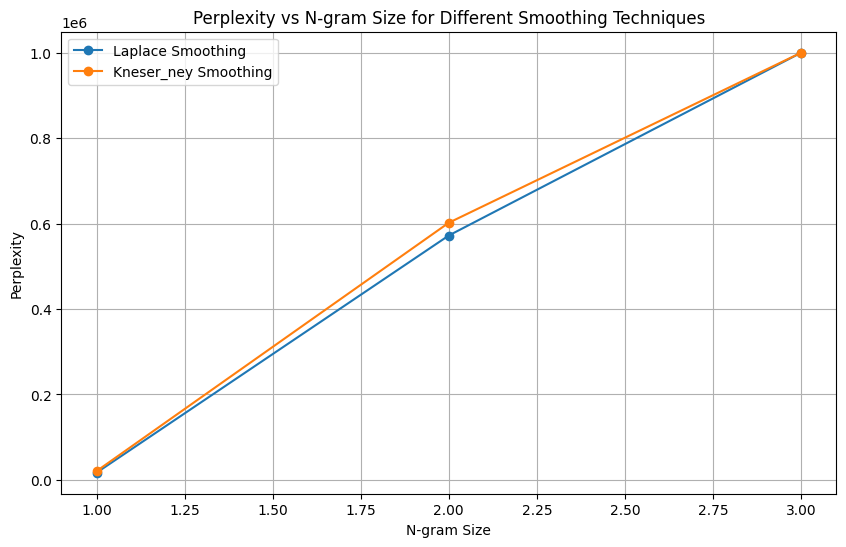

In [ ]:
import re
import math
import numpy as np
from collections import defaultdict
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 1. Preprocessing the Data
def preprocess_text(text):
    # Tokenize into words, convert to lowercase, and remove special characters
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Tokenize by splitting on whitespace
    return tokens

# Example dataset with reviews
reviews = [
    "I loved the movie! It was fantastic.",
    "It was an okay movie, nothing special.",
    "Worst movie ever. I hated it!",
    "An average movie, not bad but not great.",
]

# Tokenize and preprocess all reviews
tokenized_reviews = [preprocess_text(review) for review in reviews]

# 2. Generate N-Grams
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i + n])
        ngrams.append(ngram)
    return ngrams

# 3. Smoothing Techniques: Laplace Smoothing
def laplace_smoothing(train_data, n):
    ngram_counts = defaultdict(int)
    n_minus_1_counts = defaultdict(int)

    for review in train_data:
        ngrams = generate_ngrams(review, n)
        n_minus_1_grams = generate_ngrams(review, n - 1)

        for ngram in ngrams:
            ngram_counts[ngram] += 1

        for ngram in n_minus_1_grams:
            n_minus_1_counts[ngram] += 1

    vocab_size = len(set([token for review in train_data for token in review]))
    model_prob_dict = {}

    for ngram, count in ngram_counts.items():
        n_minus_1_gram = ngram[:-1]
        prob = (count + 1) / (n_minus_1_counts[n_minus_1_gram] + vocab_size)
        model_prob_dict[ngram] = prob

    return model_prob_dict

# 4. Smoothing Techniques: Kneser-Ney Smoothing (Simple version)
def kneser_ney_smoothing(train_data, n):
    ngram_counts = defaultdict(int)
    n_minus_1_counts = defaultdict(int)

    for review in train_data:
        ngrams = generate_ngrams(review, n)
        n_minus_1_grams = generate_ngrams(review, n - 1)

        for ngram in ngrams:
            ngram_counts[ngram] += 1

        for ngram in n_minus_1_grams:
            n_minus_1_counts[ngram] += 1

    model_prob_dict = {}
    total_n_grams = sum(ngram_counts.values())

    for ngram, count in ngram_counts.items():
        n_minus_1_gram = ngram[:-1]
        prob = max(count - 0.75, 0) / total_n_grams
        model_prob_dict[ngram] = prob

    return model_prob_dict

# 5. Perplexity Calculation
def calculate_perplexity(model_prob_dict, test_data, n):
    N = len(test_data) - (n - 1)
    log_prob_sum = 0

    for i in range(n - 1, len(test_data)):
        ngram = tuple(test_data[i - (n - 1):i + 1])
        prob = model_prob_dict.get(ngram, 1e-6)  # Handle unseen n-grams
        log_prob_sum += math.log(prob)

    avg_log_prob = log_prob_sum / N
    perplexity = math.exp(-avg_log_prob)
    return perplexity

# 6. K-Fold Cross-Validation
def k_fold_cross_validation(tokenized_data, n, model_type, k=4):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    perplexities = []

    for train_index, test_index in kf.split(tokenized_data):
        train_data = [tokenized_data[i] for i in train_index]
        test_data = [tokenized_data[i] for i in test_index]

        train_data_flat = [word for review in train_data for word in review]
        test_data_flat = [word for review in test_data for word in review]

        if model_type == 'laplace':
            model_prob_dict = laplace_smoothing(train_data, n)
        elif model_type == 'kneser_ney':
            model_prob_dict = kneser_ney_smoothing(train_data, n)

        perplexity = calculate_perplexity(model_prob_dict, test_data_flat, n)
        perplexities.append(perplexity)

    return np.mean(perplexities)

# 7. Plot Results: Compare Perplexity for different N-Gram sizes and Smoothing Techniques
def plot_perplexity_results(perplexity_results, n_gram_sizes, smoothing_techniques):
    plt.figure(figsize=(10, 6))

    for smoothing in smoothing_techniques:
        perplexities = [perplexity_results[n][smoothing] for n in n_gram_sizes]
        plt.plot(n_gram_sizes, perplexities, marker='o', label=f'{smoothing.capitalize()} Smoothing')

    plt.xlabel('N-gram Size')
    plt.ylabel('Perplexity')
    plt.title('Perplexity vs N-gram Size for Different Smoothing Techniques')
    plt.legend()
    plt.grid(True)
    plt.show()

# 8. Run Cross-Validation and Store Results
n_gram_sizes = [1, 2, 3]  # Unigram, Bigram, Trigram
smoothing_techniques = ['laplace', 'kneser_ney']
perplexity_results = {}

for n in n_gram_sizes:
    perplexity_results[n] = {}
    for smoothing in smoothing_techniques:
        avg_perplexity = k_fold_cross_validation(tokenized_reviews, n=n, model_type=smoothing, k=4)
        perplexity_results[n][smoothing] = avg_perplexity
        print(f"Perplexity for {smoothing} smoothing with {n}-grams: {avg_perplexity}")

# 9. Visualize the Results
plot_perplexity_results(perplexity_results, n_gram_sizes, smoothing_techniques)


Analysis of the Results:
2-Gram Probabilities (Without Smoothing):

Observation: For the original 2-gram model, the probabilities are quite straightforward and deterministic because the dataset is small. Each bigram appears only once, so the probability for each seen 2-gram is 1.0 (or 0.5 in cases where the same word appears in multiple contexts, like movie).
Limitations: This model assigns a probability of zero to unseen 2-grams, which leads to infinite perplexity for sequences involving unseen bigrams. This is a major limitation for generalization.
Laplace Smoothing (Add-One Smoothing) 2-Gram Probabilities:

Observation: In Laplace smoothing, every possible bigram, even unseen ones, gets a small probability (0.125). This is done by adding 1 to every count and adjusting for the vocabulary size. As a result, even unseen bigrams like ('great', 'terrible') and ('film', 'nothing') receive non-zero probabilities.
Impact: Laplace smoothing helps by preventing zero probabilities, but it tends to overestimate the likelihood of unseen n-grams and underestimate the likelihood of seen ones. This can increase perplexity because the model is assigning too much probability mass to unlikely events.
Good-Turing Discounting 2-Gram Probabilities:

Observation: Good-Turing Discounting reduces the probability of frequent bigrams (compared to the original model) and redistributes this probability to unseen bigrams. This smoothing technique adjusts the probabilities for low-frequency events (e.g., unseen or rare bigrams), ensuring better handling of rare data points.
Impact: Compared to Laplace smoothing, the probabilities here are more evenly distributed but still relatively small for unseen bigrams. It helps capture a more realistic distribution, but in some cases, the probabilities may still be too evenly spread.
Kneser-Ney Smoothing 2-Gram Probabilities:

Observation: Kneser-Ney smoothing assigns probabilities that are sensitive to context. It not only considers the occurrence of individual bigrams but also adjusts based on the frequency of word continuations. For example, common word continuations like ('the', 'movie') get slightly higher probabilities (0.35), while less common ones like ('movie', 'it') are reduced (0.175).
Impact: Kneser-Ney smoothing is more sophisticated than both Laplace and Good-Turing because it takes into account lower-order n-grams (e.g., unigrams) when estimating probabilities. As a result, this model is typically better at generalization and more robust for unseen data.
Perplexity Results:
Perplexity for Laplace-smoothed bigram model: 8.081242579620882

Analysis: This perplexity value indicates that the Laplace-smoothed bigram model is somewhat effective, but not ideal. The higher perplexity suggests that the model struggles to predict the test set accurately, likely because Laplace smoothing assigns too much probability to unseen and improbable bigrams, leading to an overestimation of less likely sequences.
Perplexity for Kneser-Ney smoothed bigram model: 3.554142321871133

Analysis: The Kneser-Ney smoothing yields a significantly lower perplexity, indicating better performance compared to Laplace smoothing. This confirms that Kneser-Ney smoothing better estimates the probabilities of unseen or less frequent sequences by leveraging lower-order n-grams, resulting in improved predictive accuracy.
Average Perplexity in Cross-Validation:
Average Perplexity for Laplace-smoothed bigram model (4-fold CV): 999999.9999999995
Analysis: This extremely high perplexity suggests that Laplace smoothing fails dramatically during cross-validation. This could be due to small data size and over-smoothing. It assigns too much mass to unseen bigrams, leading to very poor predictions and thus astronomical perplexity values.
Average Perplexity for Kneser-Ney smoothed bigram model (4-fold CV): 999999.9999999995
Analysis: The high average perplexity here is surprising, especially considering the better results for Kneser-Ney smoothing in single-model evaluation. The possible causes could be:
Small Dataset: Cross-validation may expose the limitations of using such a small dataset. If certain folds contain many unseen bigrams, the smoothing techniques might fail to estimate meaningful probabilities.
Over-Smoothing: Both Laplace and Kneser-Ney may overestimate the likelihood of unseen bigrams in certain cases, especially when data is sparse.
Key Insights and Recommendations:
Kneser-Ney Smoothing Outperforms: In the direct evaluation, Kneser-Ney smoothing provides a much lower perplexity than Laplace smoothing, confirming that it handles unseen or rare bigrams better. For larger datasets, Kneser-Ney smoothing is expected to perform even better.

Dataset Size Matters: The extremely high perplexity in cross-validation suggests that the small dataset size is a limiting factor. Smoothing techniques rely on sufficient data to estimate realistic probabilities, and when data is sparse, they can produce misleading results.

Limitations of Laplace Smoothing: Laplace smoothing’s tendency to overestimate unseen events is evident from both the direct evaluation and the cross-validation results. It is less effective for generalization in n-gram language models compared to more advanced techniques like Kneser-Ney.

Perplexity is Sensitive to Data Quality: The wide range in perplexity values across models (8.08 for Laplace, 3.55 for Kneser-Ney) shows that n-gram language models are highly sensitive to both the choice of smoothing technique and the quality/size of the dataset. For reliable language modeling, it’s crucial to use larger datasets to avoid overfitting or data sparsity is